In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
hd_data = pd.read_csv("C:/Users/CHRYS/Downloads/heart.csv")
hd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
np.random.seed(42)

#divide data into x & y
x = hd_data.drop("target", axis = 1)
y = hd_data["target"]

In [4]:
#divide data into train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [5]:
#instantiate the model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

In [6]:
#fit the model to the data
clf.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
#make predictions

y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [8]:
np.mean(y_preds == y_test)

0.8524590163934426

In [9]:
clf.score(x_test, y_test)

0.8524590163934426

In [10]:
clf.score(x_train, y_train)

1.0

In [11]:
#y_train, x_train

In [12]:
#using cross-val score
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score = cross_val_score(clf, x, y, cv = 5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [13]:
np.mean(cross_val_score)

0.8248087431693989

In [14]:
#Evaluating a clf model (accuracy)
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100: .2f}%")

Heart Disease Classifier Cross-Validated Accuracy:  82.48%


In [15]:
#evaluating using roc
from sklearn.metrics import roc_curve

#make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [16]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [17]:
#calculate the FPR, TPR and Threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [18]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [19]:
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

In [20]:
threshold

array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

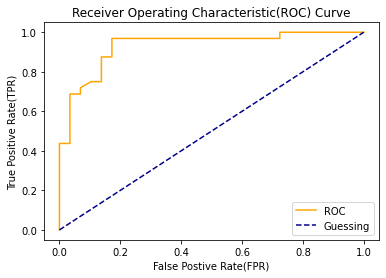

In [21]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr) and true positive rate(tpr) of a model
    """
    #plot the roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    #plot line with no predicitve power(baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Guessing")
    #customise the plot
    plt.xlabel("False Postive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("Receiver Operating Characteristic(ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

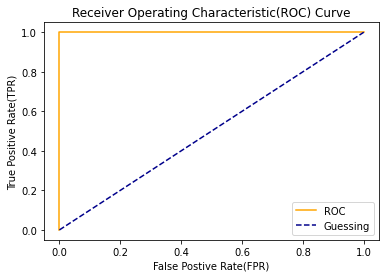

In [23]:
#plot the perfect roc curve and auc score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [24]:
roc_auc_score(y_test, y_test)

1.0

In [25]:
#evaluating using confusion matrix
from sklearn.metrics import confusion_matrix
y_preds =clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [26]:
#visualise confusion marix using pd.crosstabs()
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Labels"],
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [27]:
24+5+4+28

61

<AxesSubplot:>

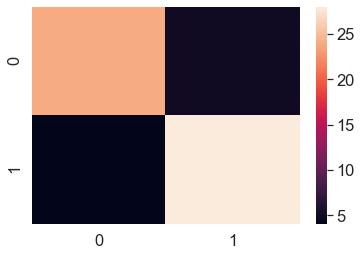

In [28]:
#make our confusion matrix more visual using seaborn's heatmap
import seaborn as sns
#set the font scale
sns.set(font_scale = 1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat)

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
#from_estimator(estimator = clf, x = x, y = y)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [31]:
#evaluating a model using calculation functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("CLassifier metrix on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100: .2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

CLassifier metrix on the test set
Accuracy:  85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [32]:
#improving our model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds
    labels on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100: .2f}%")
    print(f"Precision: {precision: .2f}%")
    print(f"Recall: {recall: .2f}%")
    print(f"f1_score: {f1: .2f}%")
    
    return  metric_dict
    

In [34]:
np.random.seed(42)
#shuffle the data
hd_data_shuffled = hd_data.sample(frac = 1)
hd_data_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [35]:
#split into x & y
hd_data_shuffled.drop("target", axis = 1)
hd_data_shuffled["target"]
#split the data into train, validation and test
train_split = round(0.7 * len(hd_data_shuffled)) #70% of the data
valid_split = round(train_split + 0.15 * len(hd_data_shuffled)) #15% of the data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split: valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [36]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
#make baseline predictions
y_preds = clf.predict(x_valid)
#evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc:  71.11%
Precision:  0.00%
Recall:  0.00%
f1_score:  0.00%


C:\Users\CHRYS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
